# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [2]:
import urllib
import requests
import os
import numpy as np

In [3]:
import pandas as pd
import zipfile 

In [4]:
from matplotlib import pyplot as plt
% matplotlib inline

In [5]:
wd = os.getenv("PUIDATA");wd

'/nfshome/jl9200/PUIdata'

In [6]:
os.system("mkdir HW12 $PUIDATA")

256

In [10]:
directory = os.path.join(wd+'/HW12');directory

'/nfshome/jl9200/PUIdata/HW12'

In [11]:
## download file from professor's repo

In [12]:
urlprefix = "https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/"

In [13]:
[urlprefix+"zbp%.2dtotals.zip" % i for i in list(range(15))+list(range(94,100))]

['https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp00totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp01totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp02totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp03totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp04totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp05totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp06totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp07totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp08totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp09totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp10t

In [14]:
zipurls = [urlprefix+"zbp%.2dtotals.zip" % i for i in list(range(15))+list(range(94,100))]

In [15]:
def shift(seq, shift=1):
    return seq[-shift:] + seq[:-shift]

In [16]:
# shift the order
filenames = [zipurls[i].split('/')[-1] for i in range(len(zipurls))];filenames

['zbp00totals.zip',
 'zbp01totals.zip',
 'zbp02totals.zip',
 'zbp03totals.zip',
 'zbp04totals.zip',
 'zbp05totals.zip',
 'zbp06totals.zip',
 'zbp07totals.zip',
 'zbp08totals.zip',
 'zbp09totals.zip',
 'zbp10totals.zip',
 'zbp11totals.zip',
 'zbp12totals.zip',
 'zbp13totals.zip',
 'zbp14totals.zip',
 'zbp94totals.zip',
 'zbp95totals.zip',
 'zbp96totals.zip',
 'zbp97totals.zip',
 'zbp98totals.zip',
 'zbp99totals.zip']

In [17]:
filenames = shift(filenames,shift=6);filenames

['zbp94totals.zip',
 'zbp95totals.zip',
 'zbp96totals.zip',
 'zbp97totals.zip',
 'zbp98totals.zip',
 'zbp99totals.zip',
 'zbp00totals.zip',
 'zbp01totals.zip',
 'zbp02totals.zip',
 'zbp03totals.zip',
 'zbp04totals.zip',
 'zbp05totals.zip',
 'zbp06totals.zip',
 'zbp07totals.zip',
 'zbp08totals.zip',
 'zbp09totals.zip',
 'zbp10totals.zip',
 'zbp11totals.zip',
 'zbp12totals.zip',
 'zbp13totals.zip',
 'zbp14totals.zip']

In [18]:
zipurls = shift(zipurls,shift=6);zipurls

['https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp94totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp95totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp96totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp97totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp98totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp99totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp00totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp01totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp02totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp03totals.zip',
 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp04t

In [19]:
df = [0]*len(zipurls)
for i in range(len(zipurls)):
    filename = zipurls[i].split('/')[-1]
    fname = os.path.join(directory+'/'+filename)
    urllib.request.urlretrieve(zipurls[i],fname)
    zf = zipfile.ZipFile(directory+'/'+filename)
    df[i]=pd.read_csv(zf.open(filename.replace('.zip','.txt')))

In [20]:
for i in range(len(df)):
    df[i].columns = map(str.upper, df[i].columns)

In [21]:
# DOWNLOAD nyc zipcode shapefile 
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
urllib.request.urlretrieve(url,'zipshp.zip')
os.system('unzip zipshp.zip -d $PUIDATA/HW12')

256

In [22]:
!ls $PUIDATA/HW12

zbp00totals.zip  zbp07totals.zip  zbp14totals.zip  ZIP_CODE_040114.dbf
zbp01totals.zip  zbp08totals.zip  zbp94totals.zip  ZIP_CODE_040114.prj
zbp02totals.zip  zbp09totals.zip  zbp95totals.zip  ZIP_CODE_040114.sbn
zbp03totals.zip  zbp10totals.zip  zbp96totals.zip  ZIP_CODE_040114.sbx
zbp04totals.zip  zbp11totals.zip  zbp97totals.zip  ZIP_CODE_040114.shp
zbp05totals.zip  zbp12totals.zip  zbp98totals.zip  ZIP_CODE_040114.shp.xml
zbp06totals.zip  zbp13totals.zip  zbp99totals.zip  ZIP_CODE_040114.shx


In [23]:
len(df)

21

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



In [24]:
dfnew = [0]*len(df)
for i in range(len(df)):
    dfnew[i] = df[i][['ZIP','EST']]
    dfnew[i].columns = ['ZIP',str(i+1994)]

In [25]:
# reference merge together
# https://stackoverflow.com/questions/13070461/get-index-of-the-top-n-values-of-a-list-in-python
from functools import reduce
mydata = reduce(lambda x, y: pd.merge(x, y, on = 'ZIP'), dfnew)

In [26]:
mydata.shape

(35885, 22)

## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [27]:
import geopandas as gp
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/HW12/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [30]:
nyczips.shape,mydata.shape

((263,), (35885, 22))

In [31]:
nyczipsshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [32]:
mydata.ZIP = mydata.ZIP.astype(str) 

In [33]:
mydata.head(1)

,ZIP,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,1001,439,439,433,457,444,469,493,490,490,...,509,509,503,477,458,448,436,453,439,458


In [34]:
nyczipsshp.head(1)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."


Index(['ZIP', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', 'ZIPCODE'],
      dtype='object')

In [290]:
# np.array([i in nyczipsshp.ZIPCODE.tolist() for i in mydata.ZIP]).sum()

In [45]:
mydata_new = nyczipsshp[['ZIPCODE']].merge(mydata,left_on = 'ZIPCODE',right_on = 'ZIP')

In [46]:
mydata_new.shape

(243, 23)

In [44]:
mydata_new.drop('ZIPCODE',axis = 1)
mydata_new.shape

(243, 23)

In [62]:
mydata_new = mydata_new.drop_duplicates(subset = ['ZIP'])

In [63]:
mydata_new.shape

(230, 23)

In [64]:
cleancsb = mydata_new[::]

In [65]:
cleancsb.head(2)

,ZIPCODE,ZIP,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,11436,11436,51,50,53,51,51,58,65,57,...,82,80,84,90,92,98,101,95,99,109
1,11213,11213,406,420,433,456,476,473,477,493,...,556,565,556,592,621,675,674,726,755,772


In [66]:
cleancsb = cleancsb.drop('ZIPCODE',axis = 1);cleancsb.shape

(230, 22)

In [67]:
cleancsb  = cleancsb.set_index('ZIP')

In [68]:
cleancsb.isnull().sum()

1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
dtype: int64

In [69]:
from sklearn.cluster import KMeans

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

In [70]:
#then the standardization will look like:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T
#cluster with kmeans
km = KMeans(n_clusters=5, random_state=444).fit(vals)
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape
vals['label'] = km.labels_

In [55]:
# vals.iloc[200].plot()

In [71]:
vals.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,label
ZIP,,,,,,,,,,,,,,,,,,,,,
11436,-1.296083,-1.347340,-1.193568,-1.296083,-1.296083,-0.937280,-0.578478,-0.988538,0.087870,-0.117160,...,0.190385,0.395415,0.702960,0.805475,1.113020,1.266793,0.959248,1.164278,1.676853,0
11213,-1.433782,-1.305462,-1.186307,-0.975496,-0.792181,-0.819678,-0.783015,-0.636364,-0.150580,0.060232,...,0.023569,-0.058923,0.271044,0.536850,1.031799,1.022634,1.499252,1.765058,1.920875,0
11212,-1.077974,-1.210216,-1.114040,-0.813490,-0.909666,-0.645182,-0.897644,-0.813490,-0.212389,-0.164301,...,-0.296543,-0.092169,0.088161,0.629152,1.254297,1.422605,1.518781,1.639001,1.891464,0
11225,-1.223282,-1.159696,-1.149098,-0.915948,-0.852361,-0.926545,-0.841764,-0.788775,-0.184704,-0.089324,...,0.027251,0.186217,0.249804,0.493552,0.885668,1.065830,1.341371,1.871258,2.115007,0
11218,-1.474935,-1.336988,-1.180649,-1.061095,-0.863371,-0.720826,-0.665648,-0.578281,-0.357567,-0.270200,...,0.116050,0.327569,0.419533,0.695427,0.773596,0.998909,1.375964,1.753018,1.978331,0


In [72]:
# np.mean(vals[vals.label==0].iloc[:,:-1],axis = 1)

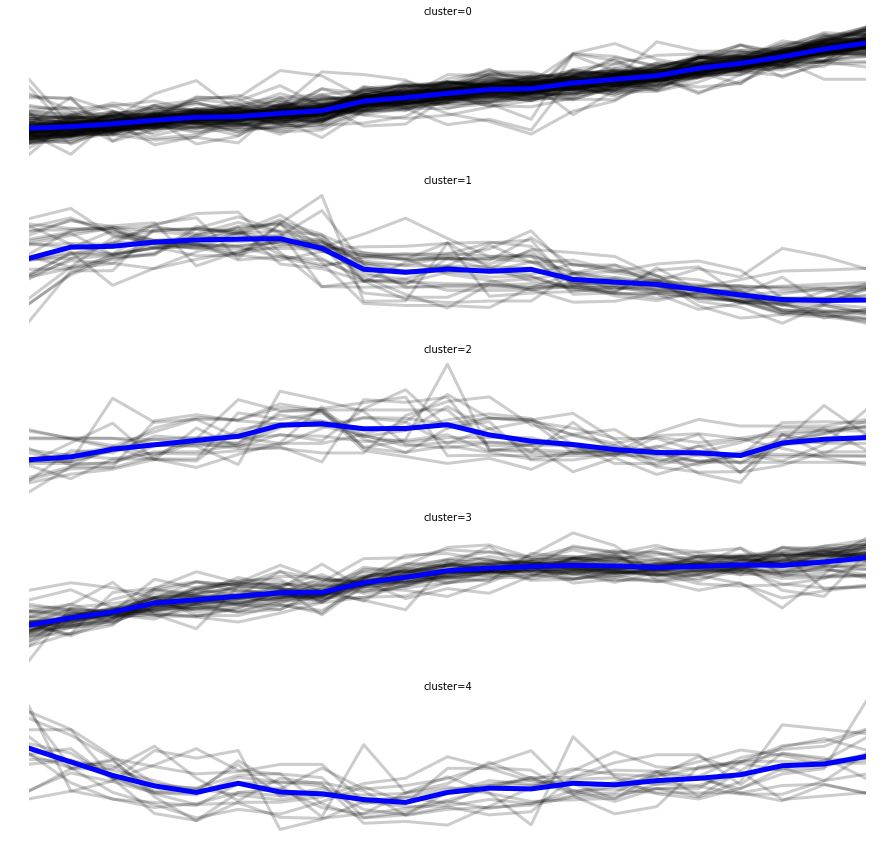

In [73]:
fig = plt.figure(figsize = (15,15))
kn= 5
axlist = ['ax1','ax2','ax3','ax4','ax5']
for i in range(kn):
    axlist[i] = fig.add_subplot(str(51)+str(i+1))
    for j in range(len(vals)):       
        if vals.label[j] ==i:
            #print(True)
            vals.iloc[j][:-1].plot(color = 'black',alpha = 0.2,lw = 3)
    np.mean(vals[vals.label==i].iloc[:,:-1],axis = 0).plot(color = 'blue',lw = 5)
    axlist[i].set_title('cluster='+str(i),fontsize = 10)
    axlist[i].axis('off')
    

** Figure 1_1: ** These plots show the 5 clusters k-mean, each black lines represent one zip code values in that clusters, while the blue one represent the total means of the those clusters results.

In [74]:
nyczipsshp['ZIPCODE'] = nyczipsshp['ZIPCODE'].astype(str)

In [75]:
vals_label = vals.reset_index()[['ZIP','label']]

In [76]:
nyckmshp = nyczipsshp.merge(vals_label,left_on = 'ZIPCODE',right_on = 'ZIP')

In [77]:
nyckmshp.shape

(243, 15)

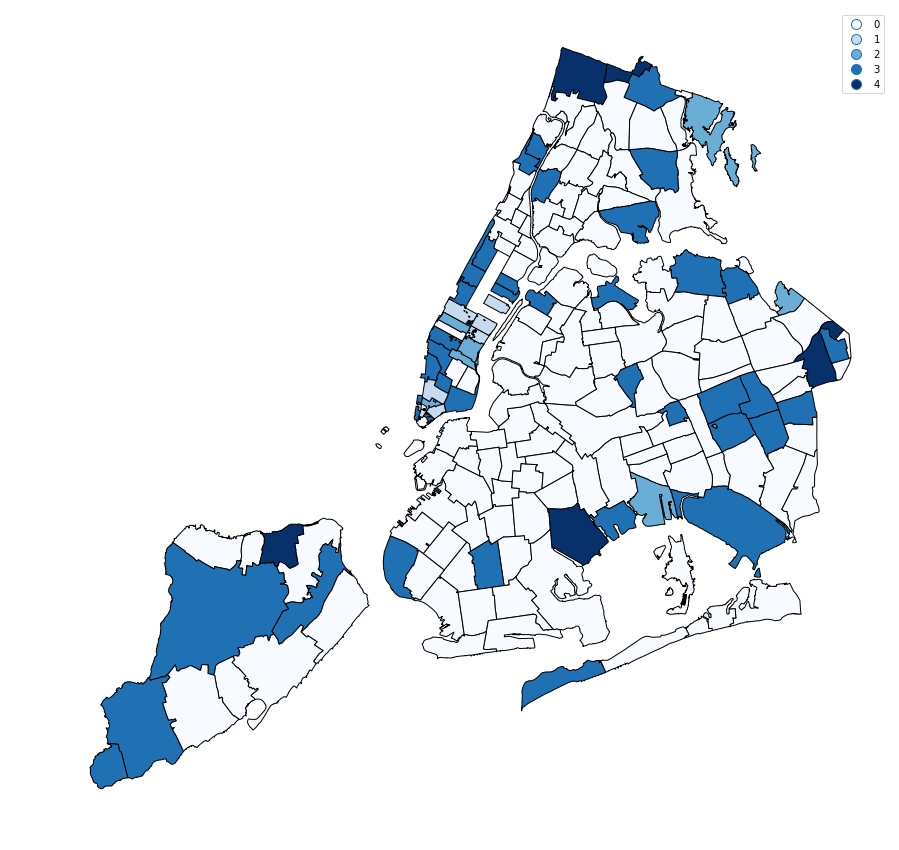

In [78]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
nyckmshp.plot(ax = ax,column = 'label',cmap = 'Blues',edgecolor = 'black',\
              legend = True,categorical = True)
ax.axis('off')
plt.legend()
plt.show()


**Figure 1_2: ** cloropleth of cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### The map of the clusters may look something like this

** Cluster=3 **

In [79]:
kn = 3

#then the standardization will look like:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T
#cluster with kmeans
km = KMeans(n_clusters=kn, random_state=444).fit(vals)
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape
vals['label'] = km.labels_


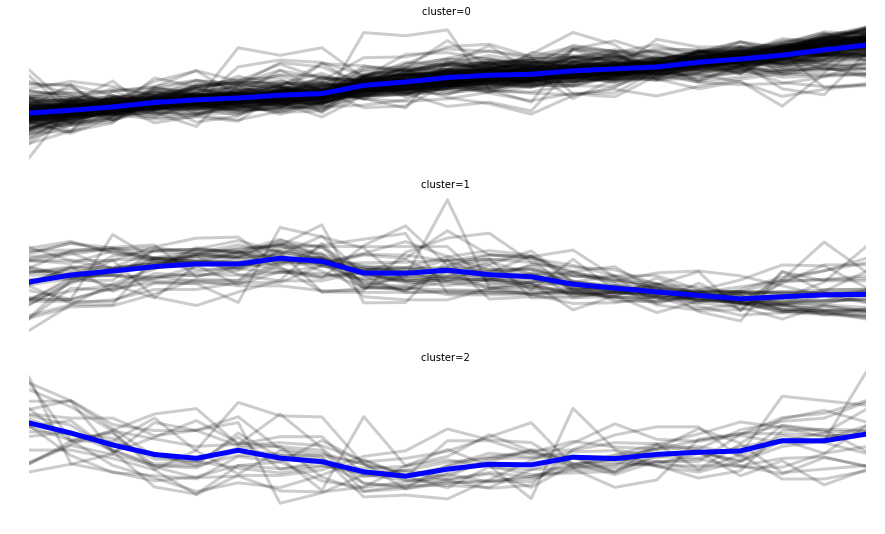

In [80]:
fig = plt.figure(figsize = (15,3*kn))

axlist = ['ax'+str(kn) for i in range(kn)]
for i in range(kn):
    axlist[i] = fig.add_subplot(str(kn)+str(1)+str(i+1))
    for j in range(len(vals)):       
        if vals.label[j] ==i:
            #print(True)
            vals.iloc[j][:-1].plot(color = 'black',alpha = 0.2,lw = 3)
    np.mean(vals[vals.label==i].iloc[:,:-1],axis = 0).plot(color = 'blue',lw = 5)
    axlist[i].set_title('cluster='+str(i)+' '
                        ,fontsize = 10)
    axlist[i].axis('off')
    

** Figure 2_1: **
These plots show the 3 clusters k-mean, each black lines represent one zip code values in that clusters, while the blue one represent the total means of the those clusters results. In this case, majority observation fall into the 0 cluster 

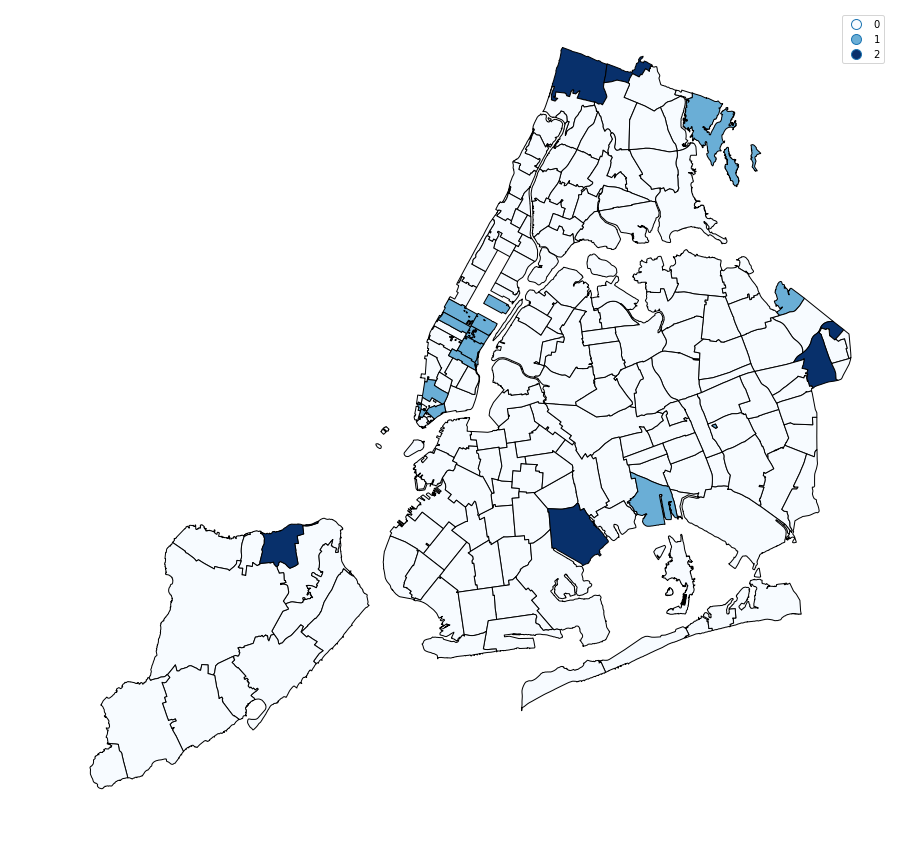

In [81]:
vals_label = vals.reset_index()[['ZIP','label']]
nyckmshp = nyczipsshp.merge(vals_label,left_on = 'ZIPCODE',right_on = 'ZIP')
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
nyckmshp.plot(ax = ax,column = 'label',cmap = 'Blues',edgecolor = 'black',\
              legend = True,categorical = True)
ax.axis('off')
plt.legend()
plt.show()

**Figure 2_2: **
cloropleth of cluster centers for 3 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top. However, I also show there are missing zipcode boundary in the central park and brooklyn Navy Yard area

In [364]:
kn = 7

#then the standardization will look like:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T
#cluster with kmeans
km = KMeans(n_clusters=kn, random_state=444).fit(vals)
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape
vals['label'] = km.labels_

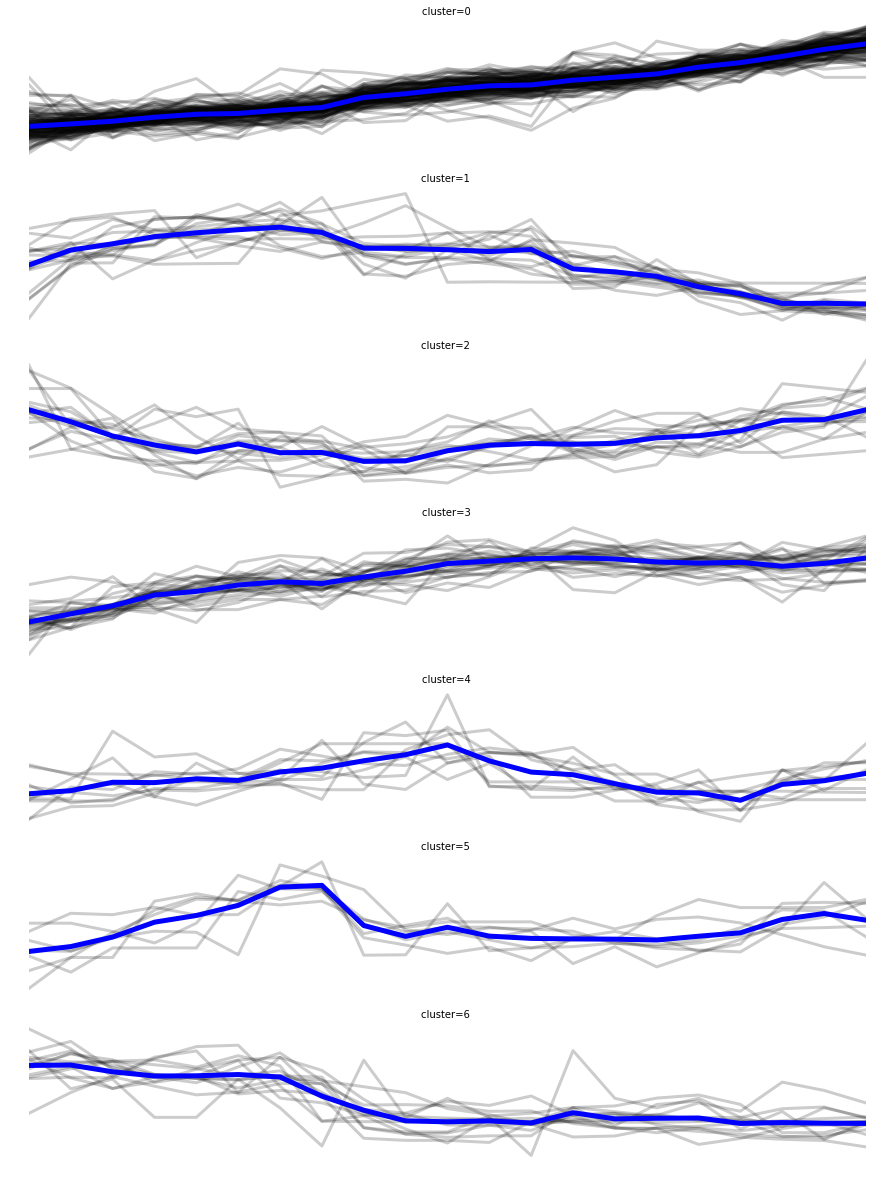

In [365]:
fig = plt.figure(figsize = (15,3*kn))

axlist = ['ax'+str(kn) for i in range(kn)]
for i in range(kn):
    axlist[i] = fig.add_subplot(str(kn)+str(1)+str(i+1))
    for j in range(len(vals)):       
        if vals.label[j] ==i:
            #print(True)
            vals.iloc[j][:-1].plot(color = 'black',alpha = 0.2,lw = 3)
    np.mean(vals[vals.label==i].iloc[:,:-1],axis = 0).plot(color = 'blue',lw = 5)
    axlist[i].set_title('cluster='+str(i)+' '
                        ,fontsize = 10)
    axlist[i].axis('off')

** Figure 3_1: **
These plots show the 7 clusters k-mean, each black lines represent one zip code values in that clusters, while the blue one represent the total means of the those clusters results. In this case, majority observation fall into the 0 and 3 cluster 

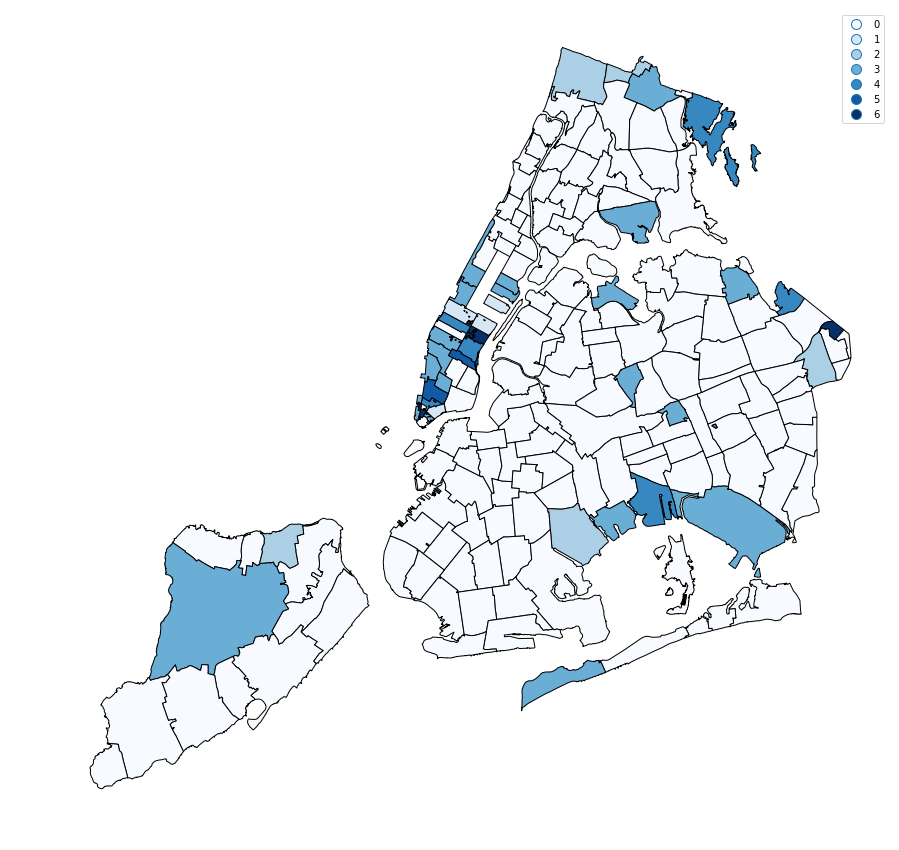

In [366]:
vals_label = vals.reset_index()[['ZIP','label']]
nyckmshp = nyczipsshp.merge(vals_label,left_on = 'ZIPCODE',right_on = 'ZIP')
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
nyckmshp.plot(ax = ax,column = 'label',cmap = 'Blues',edgecolor = 'black',\
              legend = True,categorical = True)
ax.axis('off')
plt.legend()
plt.show()

**Figure 3_2: **
cloropleth of cluster centers for 7 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top. However, there are still missing zipcode boundary in the central park and brooklyn Navy Yard area. But for the 7 clusters, we can see there are more classification on the Manhattan midtown and lower Manhattan area, The La Guarida and JFK Airport will become the same cluster.

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

### Figure 9: 
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

In [82]:
vals.shape[1]

22

In [83]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
AgglomerativeClustering?

In [115]:
kn=5

# fit (vals) instead of fit()
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))
labelsag


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 4, 2, 0, 2, 0, 0, 2, 2, 2,
       1, 0, 4, 3, 0, 0, 1, 2, 0, 4, 0, 2, 0, 0, 2, 2, 4, 2, 0, 3, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 4, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2])

In [116]:
vals.label = labelsag

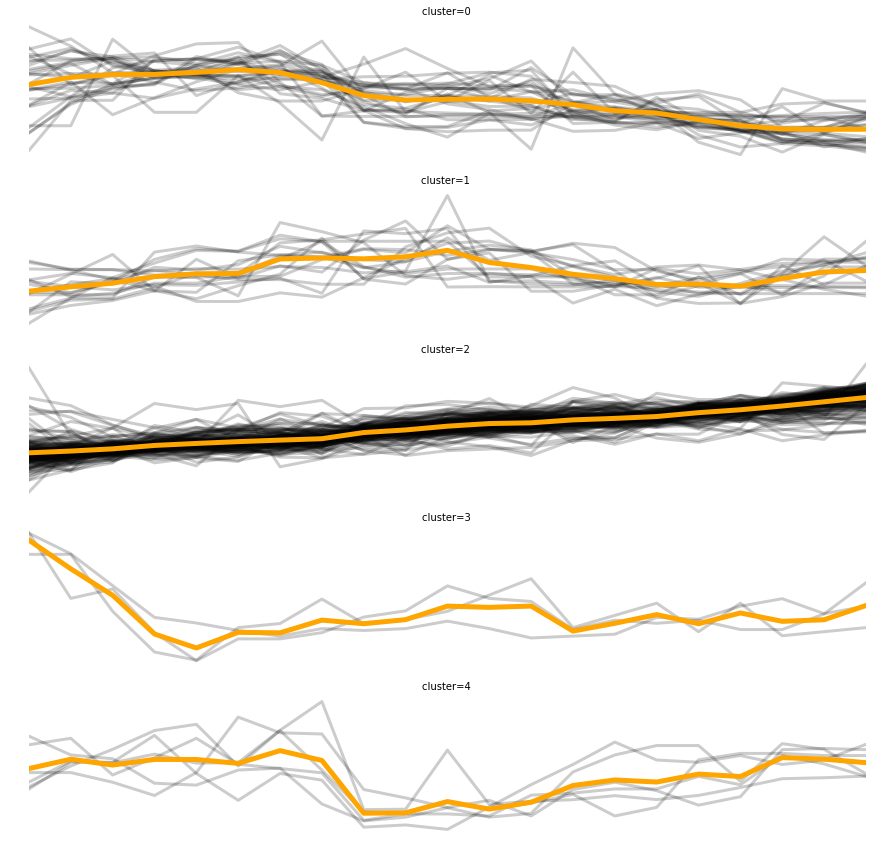

In [117]:
fig = plt.figure(figsize = (15,3*kn))

axlist = ['ax'+str(kn) for i in range(kn)]
for i in range(kn):
    axlist[i] = fig.add_subplot(str(kn)+str(1)+str(i+1))
    for j in range(len(vals)):       
        if vals.label[j] ==i:
            #print(True)
            vals.iloc[j][:-1].plot(color = 'black',alpha = 0.2,lw = 3)
    np.mean(vals[vals.label==i].iloc[:,:-1],axis = 0).plot(color = 'orange',lw = 5)
    axlist[i].set_title('cluster='+str(i)+' '
                        ,fontsize = 10)
    axlist[i].axis('off')

** Figure 4_1: **
These plots show the 5 clusters k-mean, each black lines represent one zip code values in that clusters, while the Orange one represent the total means of the those clusters results. Compared to the K-mean clustering, the agglomerative model have my opservations in the middle cluster, the clusters of 3 and 4 had decreased significantlly.

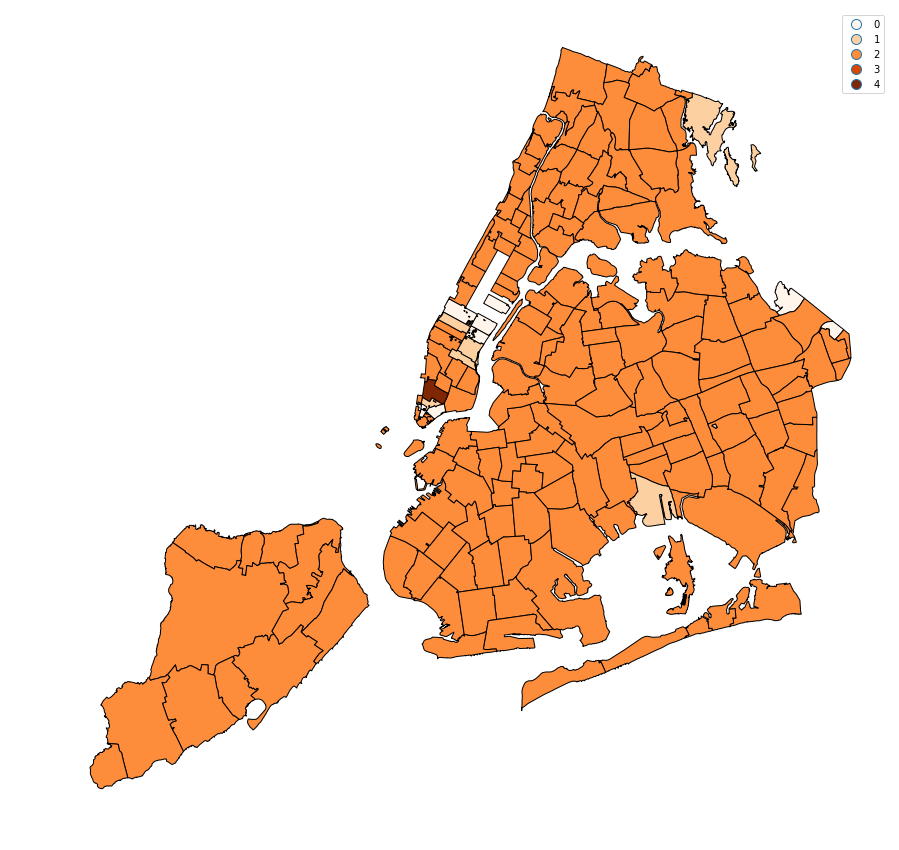

In [118]:
vals_label = vals.reset_index()[['ZIP','label']]
nyckmshp = nyczipsshp.merge(vals_label,left_on = 'ZIPCODE',right_on = 'ZIP')
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
nyckmshp.plot(ax = ax,column = 'label',cmap = 'Oranges',edgecolor = 'black',\
              legend = True,categorical = True)
ax.axis('off')
plt.legend()
plt.show()

**Figure 4_2: **
cloropleth of cluster centers for 5 k-means clusters of business patterns using Agglomerative Clustering Algorithms (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top. However, there are still missing zipcode boundary in the central park and brooklyn Navy Yard area. But for the 5 clusters, we can see there are more classification is becoming more homogeneric compared to the K-mean clustering methods.

** Conclusion **

Comparing with the agglomerative clustering and K-mean with 5 clusters algorithm, I found out just visually that the agglomerative clustering will push most of the observation to the center, while the K-mean will have more defential effect.  The agglomerative use the hierarchial clustering method, while K-means is a partial clustering function, which we identify both the similarity and dis-similarity.  K-mean funciton will find all the cluster simutanously. But the Agglomerative clustering is a bottom-up tree model method.

In [ ]:
# reference: https://www.quora.com/What-is-the-difference-between-k-means-and-hierarchical-clustering

In [120]:
zipcodes = vals.reset_index().ZIP.tolist()

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

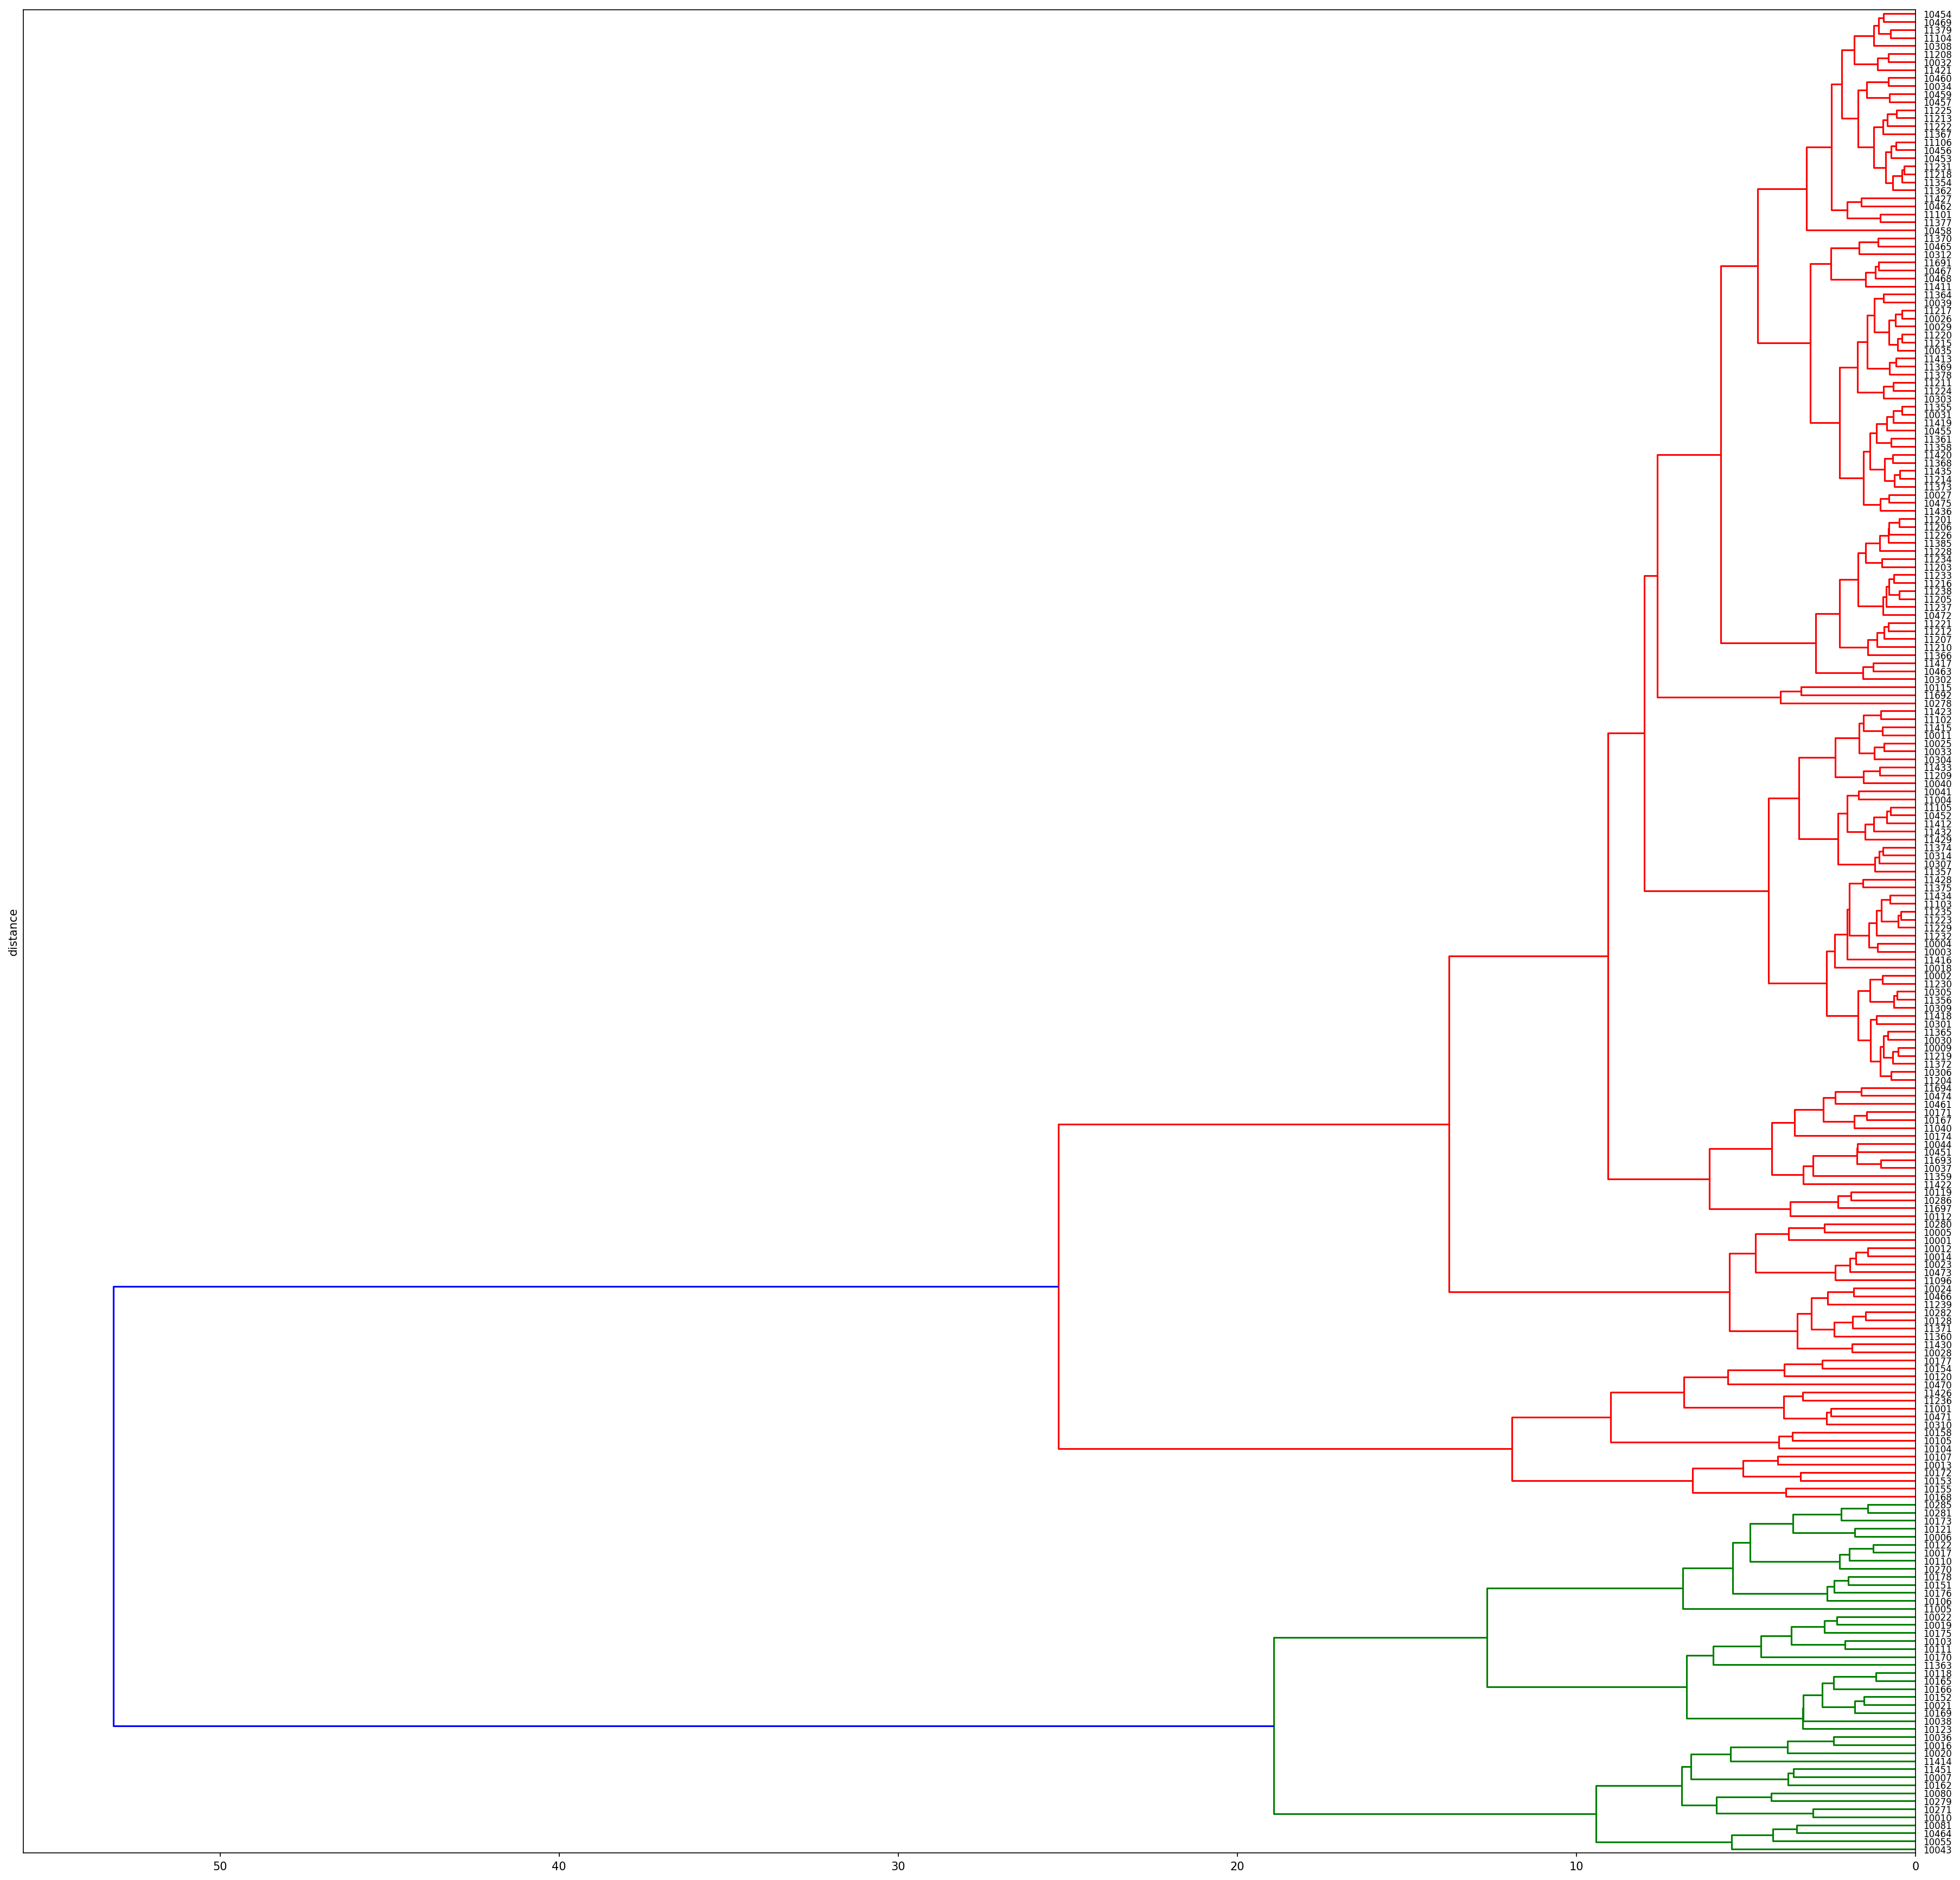

In [121]:
# reference: https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-observations/interpret-the-results/all-statistics-and-graphs/dendrogram/

import scipy.cluster as scp
fig = plt.figure(figsize=(30,30), dpi=150)
plt.ylabel("distance")


ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               orientation = 'left',
                               labels = zipcodes,
                               leaf_rotation=0.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


** Figure 5: **
This hierarchical clustering plot show the show the clustering decision tree for each observations. The color indicate that there are only two clusters.


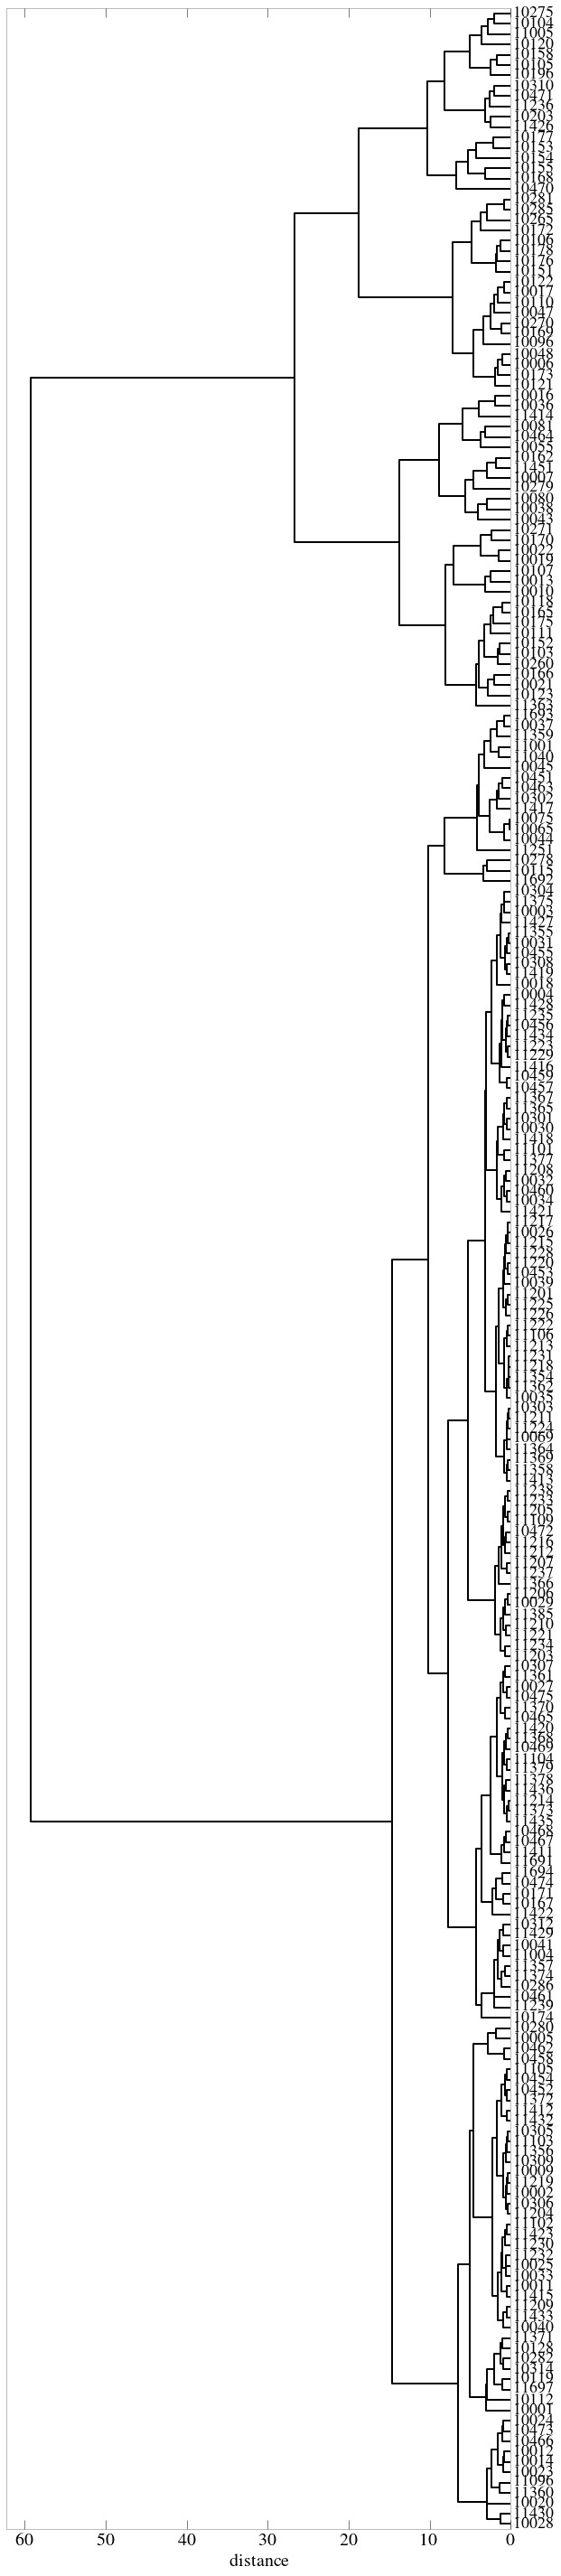

In [1]:
import scipy.cluster as scp
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


In [100]:
!pwd

/nfshome/jl9200/PUI2018_jl9200/HW12_jl9200
